# FILER `get_data_region` endpoint in Jupyter


2021 April 13 FILER API ppt slide #5

<div>
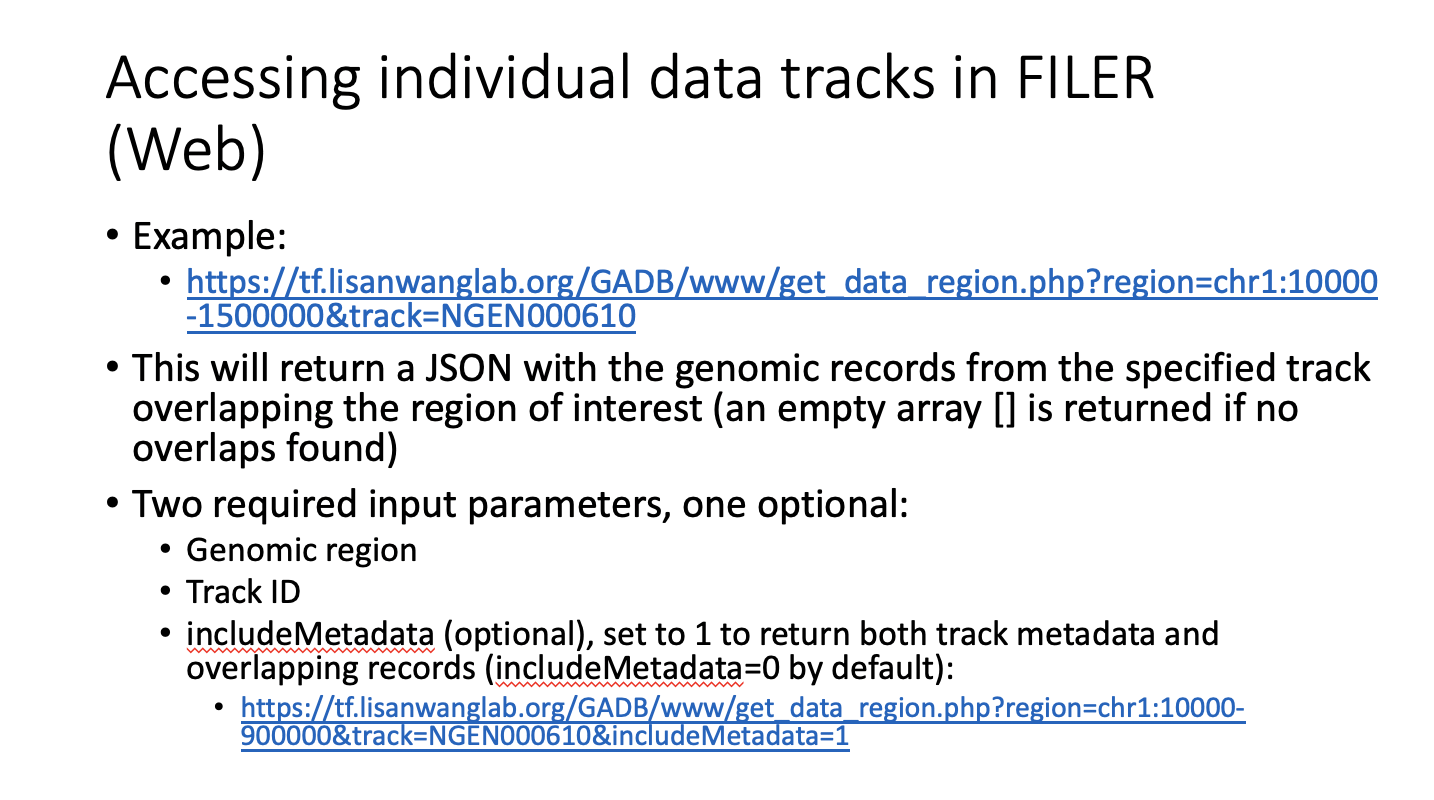
</div>  

### API variables

In [ ]:
requestURL = 'https://tf.lisanwanglab.org/FILER'
endpoint = 'get_data_region.php' 

### Setup

Imports

In [2]:
import urllib.parse
import json, requests, pprint
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Helper functions

In [3]:
def get_query_url(requestURL, endpoint):
    return ''.join([requestURL, '/', endpoint, '?'])


def process_request(requestUri, payload=None):
    ''' process request '''
    
    response = requests.get(requestUri, params=payload)
    rjson = None
    
    if response:
        print('Success!')
    else:
        print('An error has occurred:' + str(response.status_code))
    
    try: 
        rjson = response.json()
        print('Response JSON decoded')
    except ValueError:
        print('Error occurred: response JSON decode failed')
        print('response.content =\t', response.content.decode())
    
    return rjson


<br>  

### get endpoint URL 

In [4]:
_url_endpoint = get_query_url(requestURL, endpoint)

print(_url_endpoint)

https://tf.lisanwanglab.org/FILER/get_data_region.php?


<br>  

## FILER API request example - with metadata

#### API request

In [5]:
## example query params
_params = {
    'region':'chr1:10000-900000',
    'track':'NGEN000610', 
    'includeMetadata':1
}


## process API request
rjson = process_request(_url_endpoint, _params)


## display response
print("Response length =\t", len(rjson))
print("Response type =\t ", type(rjson))
if isinstance(rjson, list):
    pprint.pprint(rjson[:2])
else:
    pprint.pprint(rjson)

Success!
Response JSON decoded
Response length =	 6
Response type =	  <class 'dict'>
{'Identifier': 'NGEN000610',
 'features': [{'chr': 'chr1',
               'end': 780403,
               'name': 'Peak_1892',
               'pValue': 1405.68005,
               'peak': 1193,
               'qValue': 1402.31372,
               'score': 133,
               'signalValue': 62.055,
               'start': 777957,
               'strand': '.'},
              {'chr': 'chr1',
               'end': 827904,
               'name': 'Peak_8748',
               'pValue': 304.29565,
               'peak': 674,
               'qValue': 301.79691,
               'score': 36,
               'signalValue': 20.25406,
               'start': 826644,
               'strand': '.'},
              {'chr': 'chr1',
               'end': 877445,
               'name': 'Peak_48086',
               'pValue': 6.17021,
               'peak': 171,
               'qValue': 4.50416,
               'score': 10,
         

#### Convert response (list of json dicts | dict) to Pandas DataFrame

In [6]:
if isinstance(rjson, list):
    df = pd.DataFrame(rjson)
else:
    df = pd.DataFrame.from_dict(rjson, orient='index').T

df.shape
df.head()
df.columns

(1, 6)

,type,Identifier,url,name,metadata,features
0,bed,NGEN000610,https://tf.lisanwanglab.org/GADB/Annotationtra...,NGEN000610,"{'Identifier': 'NGEN000610', 'Data Source': 'E...","[{'chr': 'chr1', 'start': 777957, 'end': 78040..."


Index(['type', 'Identifier', 'url', 'name', 'metadata', 'features'], dtype='object')

<br>  

## FILER API request example - no metadata

#### API request

In [7]:
## example query params - no metadata
_params2 = {
    'region':'chr1:10000-900000',
    'track':'NGEN000610'
}


## process API request
rjson2 = process_request(_url_endpoint, _params2)


## display response
print("Response length =\t", len(rjson2))
print("Response type =\t ", type(rjson2))
if isinstance(rjson2, list):
    pprint.pprint(rjson2[:2])
else:
    pprint.pprint(rjson2)

Success!
Response JSON decoded
Response length =	 3
Response type =	  <class 'list'>
[{'chr': 'chr1',
  'end': 780403,
  'name': 'Peak_1892',
  'pValue': 1405.68005,
  'peak': 1193,
  'qValue': 1402.31372,
  'score': 133,
  'signalValue': 62.055,
  'start': 777957,
  'strand': '.'},
 {'chr': 'chr1',
  'end': 827904,
  'name': 'Peak_8748',
  'pValue': 304.29565,
  'peak': 674,
  'qValue': 301.79691,
  'score': 36,
  'signalValue': 20.25406,
  'start': 826644,
  'strand': '.'}]


#### Convert response (list of json dicts | dict) to Pandas DataFrame

In [8]:
if isinstance(rjson2, list):
    df2 = pd.DataFrame(rjson2)
else:
    df2 = pd.DataFrame.from_dict(rjson2, orient='index').T

df2.shape
df2.head()
df2.columns

(3, 10)

,chr,start,end,name,score,strand,signalValue,pValue,qValue,peak
0,chr1,777957,780403,Peak_1892,133,.,62.05500,1405.68005,1402.31372,1193
1,chr1,826644,827904,Peak_8748,36,.,20.25406,304.29565,301.79691,674
2,chr1,876709,877445,Peak_48086,10,.,2.33937,6.17021,4.50416,171


Index(['chr', 'start', 'end', 'name', 'score', 'strand', 'signalValue',
       'pValue', 'qValue', 'peak'],
      dtype='object')